# Homework II

Gonçalo Bárias (ist1103124) & Raquel Braunschweig (ist1102624)

This Notebook only contains our solution for the programming and critical analysis section of the Homework (Part II). Our solution for the pen and paper section (Part I) can be found on the pdf report.

## II. Programming and critical analysis [7v]

**Considering the `column_diagnosis.arff` dataset available at the course webpage’s homework tab. Using `sklearn`, apply a 10-fold stratified cross-validation with shuffling (`random_state=0`) for the
assessment of predictive models along this section.**

### 1) [3v]

**Compare the performance of kNN with k = 5 and Naïve Bayes with Gaussian assumption
(consider all remaining parameters for each classifier as `sklearn`'s default):**

- **(a) Plot two boxplots with the fold accuracies for each classifier.**

In [22]:
import matplotlib.pyplot as plt, pandas as pd
from scipy.io.arff import loadarff
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from scipy.stats import ttest_rel

In [23]:
# Read the ARFF file and prepare data
data = loadarff("./data/column_diagnosis.arff")
df = pd.DataFrame(data[0])
df["class"] = df["class"].str.decode("utf-8")
X, y = df.drop("class", axis=1), df["class"]

In [24]:
# Initialize classifiers
knn_classifier = KNeighborsClassifier(n_neighbors=5)
naive_bayes_classifier = GaussianNB()

# Define cross-validation strategy
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

# Evaluate classifiers
knn_accuracies = cross_val_score(knn_classifier, X, y, cv=cv, scoring='accuracy')
naive_bayes_accuracies = cross_val_score(naive_bayes_classifier, X, y, cv=cv, scoring='accuracy')

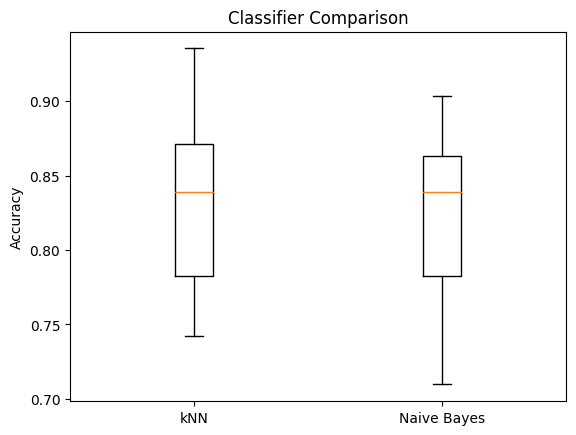

In [25]:
# Plot boxplots
plt.boxplot([knn_accuracies, naive_bayes_accuracies], labels=['kNN', 'Naive Bayes'])
plt.title('Classifier Comparison')
plt.ylabel('Accuracy')
plt.show()

- **(b) Using `scipy`, test the hypothesis "kNN is statistically superior to naïve Bayes regarding accuracy", asserting whether is true.**

In [26]:
# Perform paired t-test
t_statistic, p_value = ttest_rel(knn_accuracies, naive_bayes_accuracies)

# Check the p-value
if p_value < 0.05:
    print("Reject null hypothesis: kNN is statistically superior to Naive Bayes in terms of accuracy")
else:
    print("Fail to reject null hypothesis: No significant difference in accuracy between kNN and Naive Bayes")

Fail to reject null hypothesis: No significant difference in accuracy between kNN and Naive Bayes


### 2) [2.5v]

**Consider two kNN predictors with k = 1 and k = 5 (uniform weights, Euclidean distance,
all remaining parameters as default). Plot the differences between the two cumulative confusion
matrices of the predictors. Comment.**

In [1]:
import numpy as np, matplotlib.pyplot as plt, pandas as pd, seaborn as sns
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from scipy.io.arff import loadarff

In [2]:
# Read the ARFF file and prepare data
data = loadarff("./data/column_diagnosis.arff")
df = pd.DataFrame(data[0])
df["class"] = df["class"].str.decode("utf-8")
X, y = df.drop("class", axis=1), df["class"]

In [3]:
# Initialize StratifiedKFold with 10 folds and shuffling
folds = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

# Create kNN classifiers with k=1 and k=5
knn_1 = KNeighborsClassifier(
    n_neighbors=1, weights="uniform", metric="euclidean"
)
knn_5 = KNeighborsClassifier(
    n_neighbors=5, weights="uniform", metric="euclidean"
)

labels = ["Hernia", "Normal", "Spondylolisthesis"]
cm_1, cm_5 = np.zeros((3, 3)), np.zeros((3, 3))
for train_k, test_k in folds.split(X, y):
    X_train, X_test = X.iloc[train_k], X.iloc[test_k]
    y_train, y_test = y.iloc[train_k], y.iloc[test_k]

    # Fit kNN classifiers and assess
    knn_1.fit(X_train, y_train)
    knn_5.fit(X_train, y_train)
    knn_1_pred, knn_5_pred = knn_1.predict(X_test), knn_5.predict(X_test)
    cm_1 += np.array(confusion_matrix(y_test, knn_1_pred, labels=labels))
    cm_5 += np.array(confusion_matrix(y_test, knn_5_pred, labels=labels))

# Calculate cumulative confusion matrices
cm_diff = cm_1 - cm_5
cm_diff_df = pd.DataFrame(cm_diff, index=labels, columns=labels)

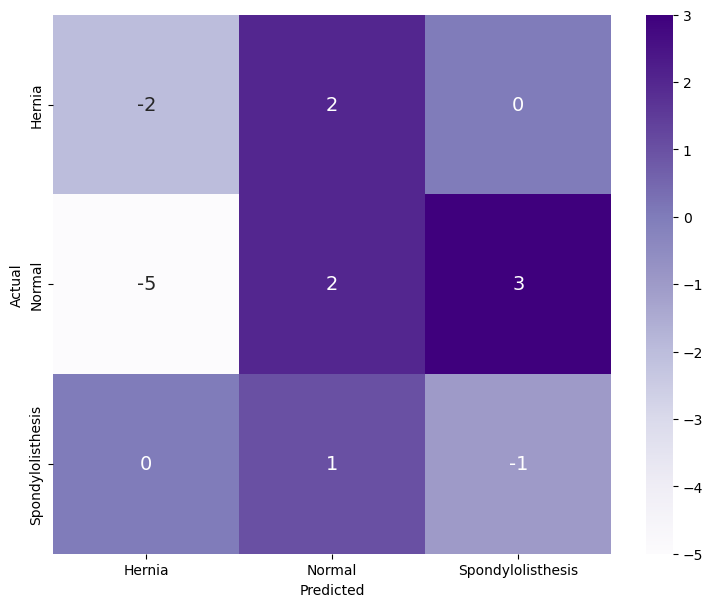

In [4]:
# Plot the differences
plt.figure(figsize=(9, 7))
sns.heatmap(
    cm_diff_df, cmap="Purples", annot=True, annot_kws={"fontsize": 14}, fmt="g"
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Blah

### 3) [1.5v]

**Considering the unique properties of `column_diagnosis`, identify three possible difficulties
of Naïve Bayes when learning from the given dataset.**

Blah